In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# Cases vs Time

In [2]:
time_df = pd.read_csv('Time.csv')

In [3]:
time_df.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [4]:
time_df.shape


(163, 7)

In [5]:
#drop null if any and delete the unnecessary column ['time']
time_df.dropna()
time_df.drop(columns=['time'])


,date,test,negative,confirmed,released,deceased
0,2020-01-20,1,0,1,0,0
1,2020-01-21,1,0,1,0,0
2,2020-01-22,4,3,1,0,0
3,2020-01-23,22,21,1,0,0
4,2020-01-24,27,25,2,0,0
...,...,...,...,...,...,...
158,2020-06-26,1232315,1200885,12602,11172,282
159,2020-06-27,1243780,1211261,12653,11317,282
160,2020-06-28,1251695,1219975,12715,11364,282
161,2020-06-29,1259954,1228698,12757,11429,282


         date  time  test  negative  confirmed  released  deceased
0  2020-01-20    16     1         0          1         0         0
1  2020-01-21    16     1         0          1         0         0
2  2020-01-22    16     4         3          1         0         0
3  2020-01-23    16    22        21          1         0         0
4  2020-01-24    16    27        25          2         0         0


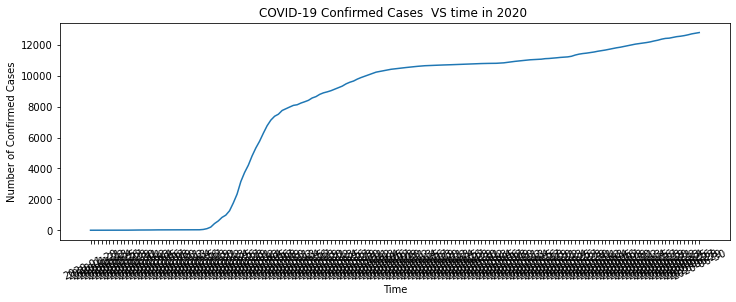

In [6]:
print(time_df.head())
plt.figure(figsize=(12, 4))
plt.xticks(rotation=25)
plt.title('COVID-19 Confirmed Cases  VS time in 2020 ')
plt.xlabel('Time')
plt.ylabel('Number of Confirmed Cases')
plt.plot(time_df['date'],time_df['confirmed'])
plt.show()

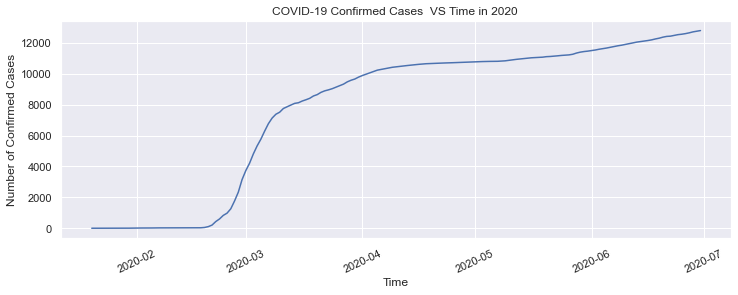

In [7]:
# The x-axis looks wried, so I tried to modify the data timestamp to give a clear view again
seaborn.set()
time_df['date']=pd.to_datetime(time_df['date'],format = '%Y-%m-%d')

plt.figure(figsize=(12, 4))
plt.xticks(rotation=25)
plt.title('COVID-19 Confirmed Cases  VS Time in 2020 ')
plt.xlabel('Time')
plt.ylabel('Number of Confirmed Cases')
plt.plot(time_df['date'],time_df['confirmed'])
plt.show()

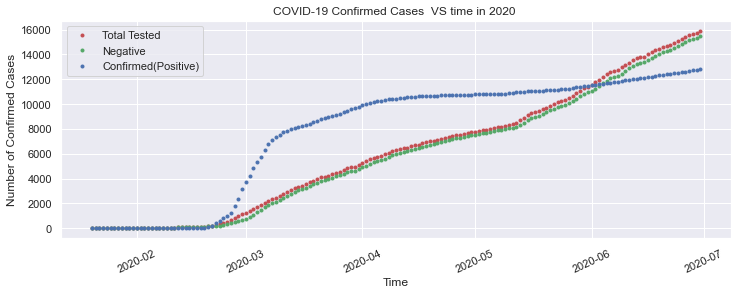

In [8]:
# Add more details into the cases ( negative and total tested cases)
time_df['percentage'] =time_df['confirmed'] / time_df['test']
plt.figure(figsize=(12, 4))
plt.xticks(rotation=25)
plt.title('COVID-19 Confirmed Cases  VS time in 2020 ')
plt.xlabel('Time')
plt.ylabel('Number of Confirmed Cases')
plt.plot(time_df['date'],time_df['test']/80,'r.')
plt.plot(time_df['date'],time_df['negative']/80,'g.')
plt.plot(time_df['date'],time_df['confirmed'],'b.')
plt.legend(['Total Tested','Negative','Confirmed(Positive)'])
plt.show()

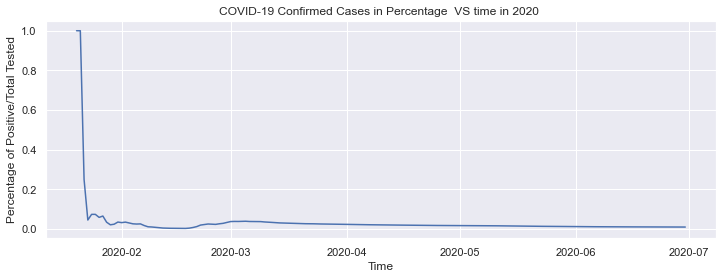

In [9]:
# Percentage ratio of confirmed cases trends
#print(time_df)
plt.figure(figsize=(12, 4))
plt.title('COVID-19 Confirmed Cases in Percentage  VS time in 2020 ')
plt.xlabel('Time')
plt.ylabel('Percentage of Positive/Total Tested')
plt.plot(time_df['date'],time_df['percentage'])
plt.show()

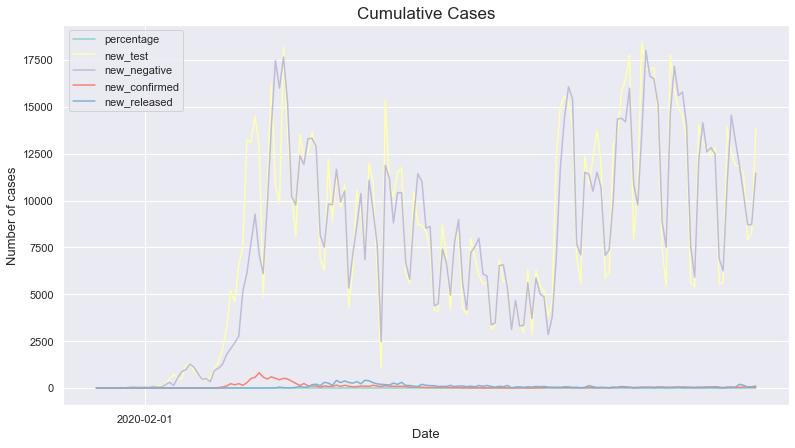

In [11]:
color_list = ['#8DD3C7', '#FEFFB3', '#BFBBD9'
              , '#FA8174', '#81B1D2', '#FDB462'
              , '#B3DE69', '#BC82BD', '#CCEBC4']

def plot_lines(data, column_list, column_max, title):
    """
    FUCNTION
        to show many plots with combinations of lines with consistent colors and legend
        useful for plotting lines with different scales at once and then separately

    RETURN
        None
    """
    for i in column_list:
        fig, ax = plt.subplots(figsize=(13, 7))
        plt.title(f'{title}', fontsize=17)
        color_group = color_list[:-4][-(column_max-i):]
        for test_each, color_each in zip(data.columns[i:column_max], color_group):
            plt.plot(data.date, data[test_each]
                     , label=test_each, color=color_each
                    )
            label=data[test_each]
        ax.set_xticks(ax.get_xticks()[::int(len(data.date)/8)])
        plt.xlabel('Date', size=13)
        plt.ylabel('Number of cases', size=13)
        ax.legend(loc='upper left')
        plt.show()

        
for col in time_df.columns[2:7]:
    if col in [2, 4]:
        new_dict = {0: 1}
    else:
        new_dict = {0: 0}
    new_dict.update({ i : time_df[col][i] - time_df[col][i-1] for i in range(1, len(time_df)) })
    time_df[f'new_{col}'] = new_dict.values()

plot_lines(time_df, [7],12, 'Cumulative Cases')